<a href="https://colab.research.google.com/github/jmerceron/AI-Activity/blob/main/Julien_MLP_Digits_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.utils import plot_model

In [3]:
mnist = tf.keras.datasets.mnist

In [4]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [5]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


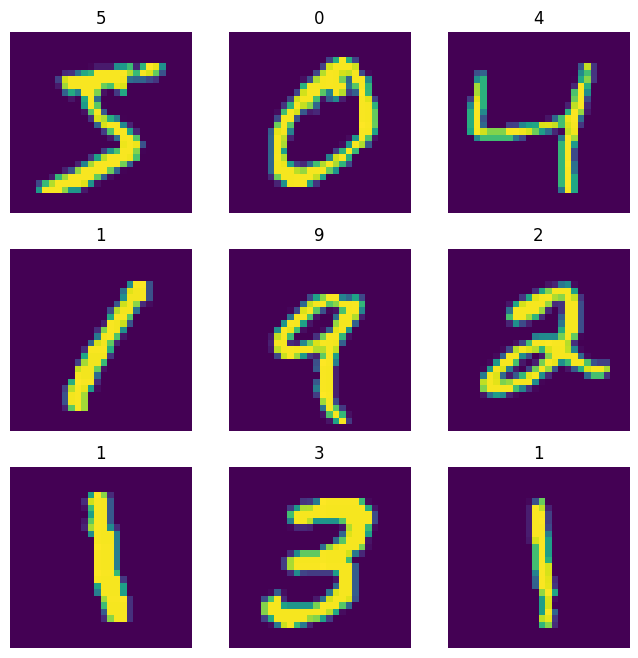

In [6]:
plt.figure(figsize=(8,8))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(x_train[i])
  plt.title(y_train[i])
  plt.axis('off')

In [7]:
x_train = tf.keras.utils.normalize(x_train, axis =0)
x_test = tf.keras.utils.normalize(x_test, axis =0)

In [8]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape = (28,28)))
model.add(tf.keras.layers.Dense(16, activation = 'relu'))
model.add(tf.keras.layers.Dense(16, activation = 'relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 16)                12560     
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 10)                170       
                                                                 
Total params: 13002 (50.79 KB)
Trainable params: 13002 (50.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


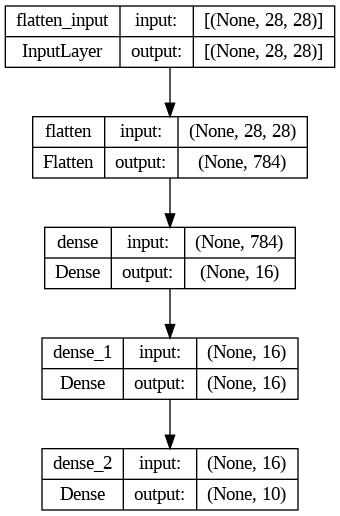

In [10]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [11]:
model.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics =['accuracy'])

In [12]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=32, epochs = 15)

Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 [==============================] - 8s 4ms/step - loss: 1.1994 - accuracy: 0.6166 - val_loss: 0.7337 - val_accuracy: 0.8057
Epoch 2/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5234 - accuracy: 0.8453 - val_loss: 0.6077 - val_accuracy: 0.8574
Epoch 3/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4234 - accuracy: 0.8781 - val_loss: 0.5555 - val_accuracy: 0.8790
Epoch 4/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3784 - accuracy: 0.8921 - val_loss: 0.5311 - val_accuracy: 0.8851
Epoch 5/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3462 - accuracy: 0.9018 - val_loss: 0.5198 - val_accuracy: 0.8950
Epoch 6/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3205 - accuracy: 0.9080 - val_loss: 0.5106 - val_accuracy: 0.9010
Epoch 7/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3017 - accuracy: 0.9140 - val_loss: 0.5102 - val_accuracy: 0.9015
Epo

In [13]:
{layer.name: layer.get_weights() for layer in model.layers}

{'flatten': [],
 'dense': [array([[-0.08500569,  0.06839763,  0.04410638, ...,  0.0407128 ,
          -0.02603207,  0.05128023],
         [ 0.00973365, -0.02492996,  0.00537658, ...,  0.06538908,
           0.01376461, -0.03460183],
         [-0.05800141,  0.04131441,  0.01301252, ...,  0.05428855,
          -0.06873675,  0.02529953],
         ...,
         [ 0.05117489, -0.01259872, -0.01669538, ...,  0.08248976,
          -0.0610528 , -0.06401549],
         [ 0.01490503, -0.05933502,  0.05988763, ...,  0.04430759,
          -0.00140877, -0.00316086],
         [ 0.06592253,  0.06125647,  0.03530192, ..., -0.06774679,
          -0.05880421,  0.044098  ]], dtype=float32),
  array([ 0.14707941,  0.09360038,  0.06033313,  0.12623364,  0.05524856,
          0.05915298,  0.1234488 ,  0.11300767,  0.10974012,  0.15533999,
          0.09704903, -0.036741  ,  0.00845248,  0.03669793,  0.10352688,
          0.0762004 ], dtype=float32)],
 'dense_1': [array([[ 0.11361146,  0.28764877, -0.787028  

In [14]:
weights1, biases1 = model.layers[1].get_weights()
print(weights1)

[[-0.08500569  0.06839763  0.04410638 ...  0.0407128  -0.02603207
   0.05128023]
 [ 0.00973365 -0.02492996  0.00537658 ...  0.06538908  0.01376461
  -0.03460183]
 [-0.05800141  0.04131441  0.01301252 ...  0.05428855 -0.06873675
   0.02529953]
 ...
 [ 0.05117489 -0.01259872 -0.01669538 ...  0.08248976 -0.0610528
  -0.06401549]
 [ 0.01490503 -0.05933502  0.05988763 ...  0.04430759 -0.00140877
  -0.00316086]
 [ 0.06592253  0.06125647  0.03530192 ... -0.06774679 -0.05880421
   0.044098  ]]


In [15]:
# cannot easily visualize filters lower down
from matplotlib import pyplot
# normalize weights values to 0-1 so we can visualize them
f_min, f_max = weights1.min(), weights1.max()
weights1 = (weights1 - f_min) / (f_max - f_min)
print(weights1)

[[0.4731583  0.49394906 0.49065688 ... 0.49019694 0.48115104 0.49162915]
 [0.48599836 0.48130038 0.48540783 ... 0.49354133 0.48654467 0.47998953]
 [0.4768182  0.49027848 0.48644271 ... 0.49203688 0.47536325 0.48810798]
 ...
 [0.49161488 0.48297164 0.48241642 ... 0.49585897 0.47640467 0.47600314]
 [0.48669922 0.47663748 0.4927957  ... 0.49068412 0.48448822 0.48425072]
 [0.49361363 0.49298123 0.48946363 ... 0.4754974  0.4767094  0.49065572]]


(784, 16)


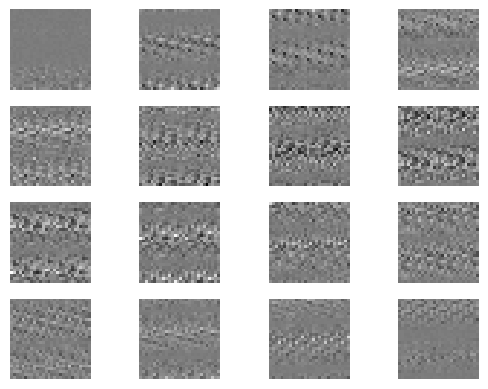

In [46]:
# Get the weights from the first Hidden layer
print(weights1.shape)

# Check if the shape is compatible for reshaping
if weights1.shape != (28 * 28, 16):
    print("The shape of the weights array is not compatible for reshaping.")

# Reshape weights into 16 images of 28 by 28
weights1_images = weights1.reshape(-1, 28, 28)

# Plot the weights
fig, axes = plt.subplots(4, 4)
for i, ax in enumerate(axes.flat):
#    ax.matshow(weights1_images[i], cmap='viridis')
    ax.matshow(weights1_images[i], cmap=plt.cm.gray, vmin=f_min, vmax=f_max)
    ax.axis('off')

plt.show()

(16, 16)


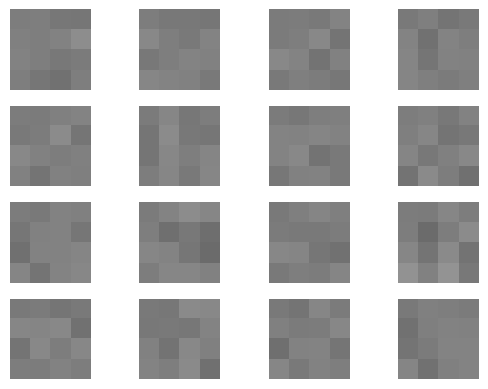

In [48]:
# Get the weights from the first Hidden layer
weights2, biases2 = model.layers[2].get_weights()
print(weights2.shape)

# normalize weights values to 0-1 so we can visualize them
f_min, f_max = weights2.min(), weights2.max()
weights2 = (weights2 - f_min) / (f_max - f_min)

# Check if the shape is compatible for reshaping
if weights2.shape != (4 * 4, 16):
    print("The shape of the weights array is not compatible for reshaping.")

# Reshape weights into 16 images of 28 by 28
weights2_images = weights2.reshape(-1, 4, 4)

# Plot the weights
fig, axes = plt.subplots(4, 4)
for i, ax in enumerate(axes.flat):
#    ax.matshow(weights2_images[i], cmap='viridis')
    ax.matshow(weights2_images[i], cmap=plt.cm.gray, vmin=f_min, vmax=f_max)
    ax.axis('off')

plt.show()

***... now you have to put your 10 digit images in content folder...***
these images have to be labelled digit_x.png, in an 28x28 resolution

In [36]:
import cv2

In [37]:
image = cv2.imread('digit_3.png')[:,:,0]
image = np.invert(np.array([image]))

1/1 [==============================] - 0s 92ms/step
3


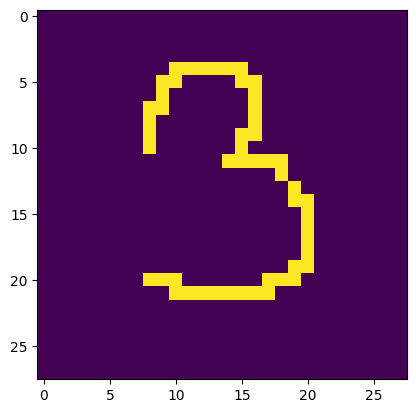

In [38]:
output = model.predict(image)
plt.imshow(image[0])
print(np.argmax(output))

In [39]:
model.save('/content/hand_written_Digit_recog_model.keras')

In [ ]:
!pip install streamlit

In [ ]:
!npm install localtunnel

npm WARN saveError ENOENT: no such file or directory, open '/content/package.json'
npm WARN enoent ENOENT: no such file or directory, open '/content/package.json'
npm WARN content No description
npm WARN content No repository field.
npm WARN content No README data
npm WARN content No license field.

+ localtunnel@2.0.2
updated 1 package and audited 36 packages in 0.447s

3 packages are looking for funding
  run `npm fund` for details

found 2 moderate severity vulnerabilities
  run `npm audit fix` to fix them, or `npm audit` for details


In [ ]:
!streamlit run /content/julien_web_app.py &> /content/logs.txt &

In [ ]:
!npx localtunnel --port 8501

npx: installed 22 in 2.387s
your url is: https://four-paws-tell.loca.lt
^C
